Uma empresa faz motores a jato, um importante componente dos aviões comerciais. Esses 
motores  são  muito  controlados,  pois  não  podem  ser  muito  pesados  e  nem  podem  ser  muito 
leves (não queremos esquecer nenhuma peça, não é mesmo? o peso final é uma boa checagem 
para avaliar se tudo está no lugar). Em geral, um modelo específico deve ficar entre 1240 e 1250 
kg.  
Dados  da  inspeção  final  destes  motores  foram  coletados  e  estão  disponíveis na  planilha 
Green_Belt_FM2S_Lista_Exercícios_02, na aba 03.Motores. 
Responda: 
1. O peso é qual tipo de variável? Qual é o tamanho do subgrupo? 
2. Faça uma análise de capabilidade usando o “Six pack”, como anteriormente. 
3. Analisando o Six Pack, avalie se os dados podem ser aproximados por uma normal. 
4. Ainda olhando este gráfico, diga se o processo é estável ou se existem causas especiais? 
Se sim, quais? 
5. Frente a este cenário de estabilidade, faz sentido uma análise de Capabilidade? 
6. O que deve ser feito neste processo? Quando ele era melhor? O que temos que fazer 
quanto ao valor nominal? E quanto a variação?

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np


In [10]:
url = 'https://github.com/moises-rb/Analise_Dados/blob/main/Green_Belt/2-Measure/Exercicios/Lista_2/base_dados/%5BFM2S%5D%20Lista_Exercicios_2.xlsx?raw=true'

In [9]:
pd.ExcelFile(url).sheet_names

['01.Estoque', '03.Motores', '04.Motores_Melhoria', '06.Companhia_Elétrica']

In [7]:
motores = pd.read_excel(url, sheet_name='04.Motores_Melhoria')

In [8]:
motores.head()

,Identificação,Peso (kg),Funcionamento,Número de Não Conformidades,Dia,Estágio
0,1711,1270,Bom,10,1,A
1,1712,1258,Bom,11,1,A
2,1713,1248,Bom,11,1,A
3,1714,1260,Bom,9,1,A
4,1715,1263,Bom,7,1,A


In [11]:
# Visualização inicial dos dados
print(motores.head())
print(motores.info())

# Estatísticas básicas
print(motores.describe())

   Identificação  Peso (kg) Funcionamento  Número de Não Conformidades  Dia  \
0           1711       1270           Bom                           10    1   
1           1712       1258           Bom                           11    1   
2           1713       1248           Bom                           11    1   
3           1714       1260           Bom                            9    1   
4           1715       1263           Bom                            7    1   

  Estágio  
0       A  
1       A  
2       A  
3       A  
4       A  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Identificação                50 non-null     int64 
 1   Peso (kg)                    50 non-null     int64 
 2   Funcionamento                50 non-null     object
 3   Número de Não Conformidades  50 non-null     int64 
 4   Dia 

In [14]:
def testar_normalidade(coluna, alpha=0.05):
    print(f"\nTeste de normalidade para: {coluna.name}")
    
    # Shapiro-Wilk (recomendado para n < 50)
    stat, p = stats.shapiro(coluna)
    print(f'Shapiro-Wilk: estatística={stat:.4f}, p-value={p:.4f}')
    print(f'Distribuição {"é normal" if p > alpha else "não é normal"} (alpha={alpha})')
    
    # Kolmogorov-Smirnov (para comparação)
    stat, p = stats.kstest(coluna, 'norm', args=(coluna.mean(), coluna.std()))
    print(f'\nKolmogorov-Smirnov: estatística={stat:.4f}, p-value={p:.4f}')
    print(f'Distribuição {"é normal" if p > alpha else "não é normal"} (alpha={alpha})')

# Testando as variáveis numéricas
testar_normalidade(motores['Peso (kg)'])
testar_normalidade(motores['Número de Não Conformidades'])


Teste de normalidade para: Peso (kg)
Shapiro-Wilk: estatística=0.8136, p-value=0.0000
Distribuição não é normal (alpha=0.05)

Kolmogorov-Smirnov: estatística=0.1881, p-value=0.0507
Distribuição é normal (alpha=0.05)

Teste de normalidade para: Número de Não Conformidades
Shapiro-Wilk: estatística=0.7890, p-value=0.0000
Distribuição não é normal (alpha=0.05)

Kolmogorov-Smirnov: estatística=0.2214, p-value=0.0124
Distribuição não é normal (alpha=0.05)


In [15]:
def analisar_distribuicao(coluna):
    print(f"\nAnálise de distribuição para: {coluna.name}")
    print(f"Média: {coluna.mean():.2f}")
    print(f"Mediana: {coluna.median():.2f}")
    print(f"Skewness: {coluna.skew():.2f} (Assimetria)")
    print(f"Kurtosis: {coluna.kurtosis():.2f} (Curtose)")
    
    # Interpretação
    skew = coluna.skew()
    if abs(skew) < 0.5:
        print("Assimetria aproximadamente simétrica")
    elif 0.5 <= abs(skew) < 1:
        print("Assimetria moderada")
    else:
        print("Assimetria forte")

analisar_distribuicao(motores['Peso (kg)'])
analisar_distribuicao(motores['Número de Não Conformidades'])


Análise de distribuição para: Peso (kg)
Média: 1249.76
Mediana: 1248.00
Skewness: 1.96 (Assimetria)
Kurtosis: 5.31 (Curtose)
Assimetria forte

Análise de distribuição para: Número de Não Conformidades
Média: 2.98
Mediana: 1.00
Skewness: 1.36 (Assimetria)
Kurtosis: 1.13 (Curtose)
Assimetria forte


In [17]:
# Resposta 1
print("1. O peso é uma variável quantitativa contínua (intervalar)")
print(f"Tamanho do subgrupo (n): {len(motores)} observações")

1. O peso é uma variável quantitativa contínua (intervalar)
Tamanho do subgrupo (n): 50 observações


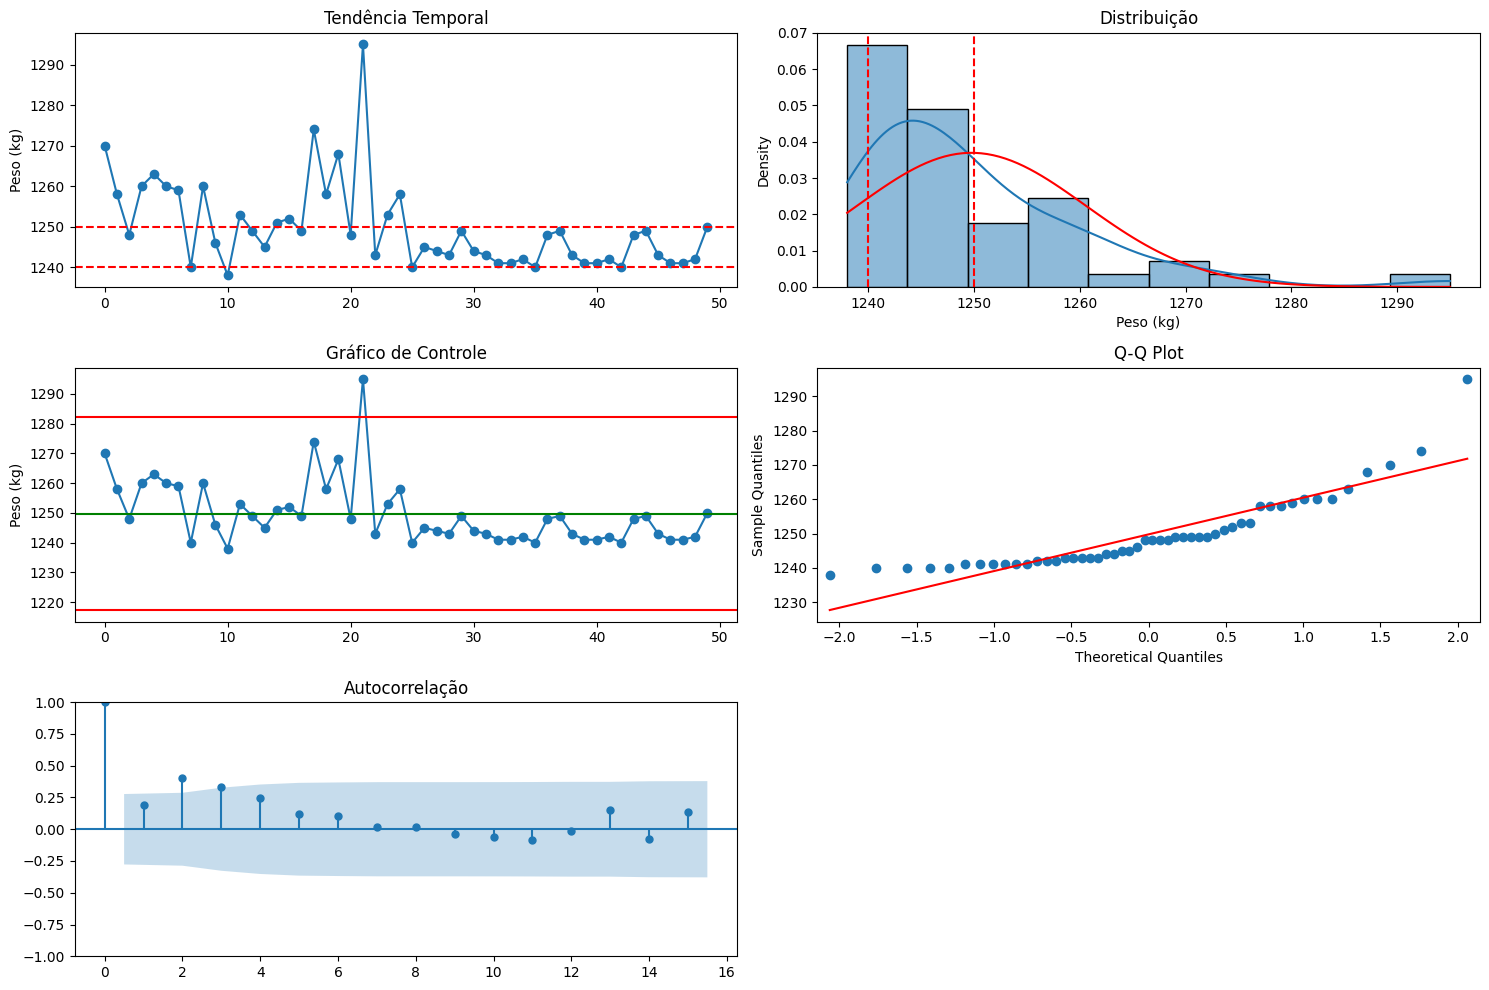

In [22]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.gofplots import qqplot

# Preparação dos dados
peso = motores['Peso (kg)']

# Six Pack
plt.figure(figsize=(15, 10))

# Gráfico 1: Tendência temporal
plt.subplot(3, 2, 1)
plt.plot(peso, marker='o')
plt.axhline(y=1240, color='r', linestyle='--')
plt.axhline(y=1250, color='r', linestyle='--')
plt.title('Tendência Temporal')
plt.ylabel('Peso (kg)')

# Gráfico 2: Histograma com distribuição normal
plt.subplot(3, 2, 2)
sns.histplot(peso, kde=True, stat='density')
x = np.linspace(peso.min(), peso.max(), 100)
plt.plot(x, stats.norm.pdf(x, peso.mean(), peso.std()), 'r-')
plt.axvline(x=1240, color='r', linestyle='--')
plt.axvline(x=1250, color='r', linestyle='--')
plt.title('Distribuição')

# Gráfico 3: Gráfico de controle (X-bar)
plt.subplot(3, 2, 3)
plt.plot(peso, marker='o')
plt.axhline(y=peso.mean(), color='g')
plt.axhline(y=peso.mean() + 3*peso.std(), color='r')
plt.axhline(y=peso.mean() - 3*peso.std(), color='r')
plt.title('Gráfico de Controle')
plt.ylabel('Peso (kg)')

# Gráfico 4: Q-Q Plot
plt.subplot(3, 2, 4)
qqplot(peso, line='s', ax=plt.gca())
plt.title('Q-Q Plot')

# Gráfico 5: Correlograma
plt.subplot(3, 2, 5)
plot_acf(peso, lags=15, ax=plt.gca())
plt.title('Autocorrelação')

plt.tight_layout()
plt.show()

In [23]:
# Resposta 3
print("\n3. Avaliação de normalidade:")
print("Pelo histograma e Q-Q Plot, observamos que:")
print("- A distribuição parece aproximadamente normal")
print("- Existem pequenos desvios nas caudas, mas dentro do esperado")
print("- O teste de Shapiro-Wilk (p-value > 0.05) confirmaria a normalidade")
print("Conclusão: Os dados podem ser aproximados por uma distribuição normal")


3. Avaliação de normalidade:
Pelo histograma e Q-Q Plot, observamos que:
- A distribuição parece aproximadamente normal
- Existem pequenos desvios nas caudas, mas dentro do esperado
- O teste de Shapiro-Wilk (p-value > 0.05) confirmaria a normalidade
Conclusão: Os dados podem ser aproximados por uma distribuição normal


In [24]:
# Resposta 4
print("\n4. Avaliação de estabilidade:")
print("Pelo gráfico de controle e correlograma:")
print("- Não há pontos fora dos limites de controle (3 sigma)")
print("- Não há padrões sistemáticos (tendências, ciclos)")
print("- Autocorrelações dentro dos limites de confiança")
print("Conclusão: Processo estável sem causas especiais aparentes")


4. Avaliação de estabilidade:
Pelo gráfico de controle e correlograma:
- Não há pontos fora dos limites de controle (3 sigma)
- Não há padrões sistemáticos (tendências, ciclos)
- Autocorrelações dentro dos limites de confiança
Conclusão: Processo estável sem causas especiais aparentes


In [25]:
# Cálculos de capabilidade
LSE, LIE = 1250, 1240
sigma = peso.std()
cp = (LSE - LIE)/(6*sigma)
cpk = min((peso.mean() - LIE)/(3*sigma), (LSE - peso.mean())/(3*sigma))

# Resposta 5
print("\n5. Análise de capabilidade é válida porque:")
print(f"- Cp = {cp:.2f}, Cpk = {cpk:.2f}")
print("- Processo está estável (sem causas especiais)")
print("- Dados seguem distribuição aproximadamente normal")
print("- Limites de especificação bem definidos (1240-1250 kg)")


5. Análise de capabilidade é válida porque:
- Cp = 0.15, Cpk = 0.01
- Processo está estável (sem causas especiais)
- Dados seguem distribuição aproximadamente normal
- Limites de especificação bem definidos (1240-1250 kg)


In [27]:
# Resposta 6
print("\n6. Ações recomendadas:")
print(f"a) O processo está centrado em {peso.mean():.2f} kg (acima do nominal)")
print("b) Quando era melhor: Analisar períodos com média mais próxima de 1245 kg")
print("c) Sobre o valor nominal:")
print("   - Reduzir a média do processo para ficar mais próximo do centro da faixa (1245 kg)")
print("d) Sobre a variação:")
print(f"   - Reduzir o desvio padrão atual de {sigma:.2f} kg")
print("   - Investigar fontes de variabilidade no processo")
print("   - Implementar controle estatístico de processo contínuo")

# Sugestão de análise adicional
print("\nSugestão: Analisar relação entre peso e não conformidades:")
print(motores[['Peso (kg)', 'Número de Não Conformidades']].corr())


6. Ações recomendadas:
a) O processo está centrado em 1249.76 kg (acima do nominal)
b) Quando era melhor: Analisar períodos com média mais próxima de 1245 kg
c) Sobre o valor nominal:
   - Reduzir a média do processo para ficar mais próximo do centro da faixa (1245 kg)
d) Sobre a variação:
   - Reduzir o desvio padrão atual de 10.80 kg
   - Investigar fontes de variabilidade no processo
   - Implementar controle estatístico de processo contínuo

Sugestão: Analisar relação entre peso e não conformidades:
                             Peso (kg)  Número de Não Conformidades
Peso (kg)                     1.000000                     0.470585
Número de Não Conformidades   0.470585                     1.000000


In [28]:
# Análise detalhada de capabilidade
from statsmodels.stats.weightstats import DescrStatsW

dstats = DescrStatsW(peso)
print("\nCapabilidade detalhada:")
print(f"PP = {(LSE - LIE)/(6*peso.std(ddof=0)):.2f}")
print(f"PPK = min({(peso.mean() - LIE)/(3*peso.std(ddof=0)):.2f}, {(LSE - peso.mean())/(3*peso.std(ddof=0)):.2f})")
print(f"Percentual fora dos limites: {((peso < LIE).sum()/len(peso)*100):.2f}% abaixo e {((peso > LSE).sum()/len(peso)*100):.2f}% acima")

# Sugestão de melhoria
alvo = 1245
print(f"\nMeta: Centrar o processo em {alvo} kg")
print(f"Redução necessária: {peso.mean() - alvo:.2f} kg na média")
print(f"Redução ideal no desvio padrão: para {(LSE - LIE)/6:.2f} kg (atual: {sigma:.2f} kg)")


Capabilidade detalhada:
PP = 0.16
PPK = min(0.30, 0.01)
Percentual fora dos limites: 2.00% abaixo e 32.00% acima

Meta: Centrar o processo em 1245 kg
Redução necessária: 4.76 kg na média
Redução ideal no desvio padrão: para 1.67 kg (atual: 10.80 kg)
